In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [280]:
zdroj = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))
zdroj = zdroj.merge(pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet')), left_index=True, right_index=True, how='left')
zdroj.sample(5)

,rok,titul,autorstvo,autorstvo_kod,008
001,,,,,
bk196403755,1964.0,Muzikantské řemeslo,Kutinová Amálie,jk01071111,[971209s1964 xr ac 000 1 cze]
nkc20213342842,2021.0,Nejistota,Ráž Roman,jk01102144,[210709s2021 xr e 000 j cze]
nkc20132502118,2013.0,Tajný cestovní deník,Jiroušková Jana,xx0001766,[131216s2013 xr a b 000 j cze]
cpk20011028612,1868.0,"Klenotník Guruba, první křesťan na ostrově Borneu",Pečírka Josef,jk01092263,[011029s1868 xr j 000 j cze]
nkc20233556579,2023.0,Bylinkářka,Voříšková Eva,xx0309130,[231027s2023 xr a g 000 f cze]


In [281]:
zdroj = zdroj.explode('008')
zdroj['rok'] = zdroj['008'].apply(lambda x: najdi_rok(x))

In [282]:
zdroj = zdroj[zdroj['rok'] > 2009]

In [283]:
zdroj.sample(5)

,rok,titul,autorstvo,autorstvo_kod,008
001,,,,,
nkc20152704093,2015,Život ve znamení Venuše,Hausner Venuše,jo2015875306,150609s2015 xr c e 000 facze
nkc20132484517,2013,"Mladé pověsti české, aneb, Životní lapálie nep...",Sikora Kamil,ola2013778049,130822s2013 xr g 000 f cze
nkc20122416229,2013,Víla Větrnka,Rožnovská Lenka,xx0130765,121221s2013 xr a a 000 j cze
nkc20162842294,2016,"Musíme zabít Reagana, aneb, Trampoty Prokopa K...",Klán Patrik,mzk2011673373,161124s2016 xr a g 000 j cze d
nkc20132536344,2013,Kopáč opálů,Pánek Josef,jo2014802119,140107s2013 xr g 000 j cze


In [284]:
zdroj = zdroj.merge(pd.read_parquet(os.path.join('data','cnb_vyber.parquet')), left_index=True, right_index=True, how='left')

In [285]:
zdroj.sample(5)

,rok,titul,autorstvo,autorstvo_kod,008_x,008_y,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20233517880,2023,Zejtra už,Kováčová Michaela,xx0281073,231123s2023 xr a g 000 f cze,231123s2023 xr a g 000 f cze,[978-80-11-03149-7],None,"[(Vladimír Kalný ;, vázáno)]",None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0:82-3)]",[aut],[xx0281073],"[Kováčová, Michaela,]",[1976-],None,[Zejtra už /],[Michaela Kováčová],None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Karlových Varech :],"[vlastním nákladem,]",[2023],[1],[182 stran :],[ilustrace (převážně barevné) ;],[19 cm],None,None,[Skutečný nakladatel: Vladimír Kalný],"[Kniha ""roztodivné"" karlovarské prozaičky a bá...",None,None,None,None,None,None,None,None,None,None,"[české prózy, Czech prose]",None,None,None,None,None,None,None,None,None,[Vladimír Kalný],None,nam a22 i 4500
nkc20142594042,2014,Příběhy pavoučka Alfonse,Matysová Veronika,jn20010310113,140605s2014 xr a b 000 j cze,140605s2014 xr a b 000 j cze,[978-80-247-5186-3],None,[(váz.)],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-32, 821-93, (0:82-32)]",[aut],[jn20010310113],"[Matysová, Veronika,]",[1976-],None,[Příběhy pavoučka Alfonse /],[Veronika Matysová ; ilustrace Jitka Římánková],None,None,None,[1. vyd.],None,[Praha :],"[Grada,]",[2014],None,None,None,None,None,None,None,[79 s. :],[barev. il. ;],[22 cm],None,None,None,None,None,[Pro čtenáře od 7 let],None,None,None,None,None,None,None,None,"[české příběhy, publikace pro děti, Czech stor...",[ill],[xx0125445],"[Římánková, Jitka]",None,None,None,None,None,None,None,None,nam a22 a 4500
nkc20203222788,2020,Mozek génia,Smutný Jan,js20060728015,200820s2020 xr e 000 f cze,200820s2020 xr e 000 f cze,[978-80-242-6767-8],"[Kč 199,00]",[(brožováno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[js20060728015],"[Smutný, Jan,]",[1985-],None,[Mozek génia /],[Jan Smutný],None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Euromedia Group,]",[2020],[1],[157 stran ;],None,[20 cm],None,None,[Na obálce uveden nakladatel: Listen],"[Míla je copywriter, který je takřka neustále ...","[Pravda, láska a kokain. Nebo piko? Nikdy neví...",None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,"[Listen, Euromedia Group - Listen]",None,nam a22 i 4500
nkc20223390658,2021,Příběh stromu,Šiklová Tereza,xx0255160,230929s2021 xr a g 000 1 cze d,230929s2021 xr a g 000 1 cze d,[978-80-906863-9-7],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0.027.6)74/77, (0:82-3)]","[aut, ill]",[xx0255160],"[Šiklová, Tereza,]",[1996-],None,[Příběh stromu /],"[napsala, nakreslila a graficky upravila Terez...",None,None,None,[I. vydání],None,None,None,None,None,None,None,[[Praha] :],"[Xao,]",[2021],[1],[28 nečíslovaných stran :],[ilustrace ;],[18 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české prózy, autorské knihy]",None,None,None,None,None,None,None,None,None,None,None,cam a22 i 4500
nkc20183058804,2018,Babráci,Šmidrkal Pavel,xx0062452,181116t20182018xr a g 000 j cze d,181116t20182018xr a g 000 j cze d,[978-80-7415-179-8],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-32)]",[aut],[xx0062452],"[Šmidrkal, Pavel,]",[1953-],None,[Babráci /],[Pavel Šmidrkal],None,None,None,None,None,None,None,None,None,None,None,"[Pelhřimov :, None]","[Nová tiskárna Pelhřimov,, None]","[[2018], ©2018]","[1, 4

In [309]:
len(zdroj)

19754

In [317]:
zdroj = zdroj.explode('100_7')
tisic = zdroj.groupby('100_7').size()
tisic = tisic[tisic > 1].index.to_list()
zdroj2 = zdroj[zdroj['100_7'].isin(tisic)]

In [319]:
len(zdroj2)

13885

In [353]:
df = zdroj2[['080_a','245_a','260_b','264_b','650_a','655_a','rok','100_7','520_a','520_b','autorstvo']]

In [323]:
df.sample(5)

,080_a,245_a,260_b,264_b,650_a,655_a,rok,100_7,520_a,520_b
001,,,,,,,,,,
nkc20223475172,"[821.162.3-31, (0:82-312.5)]",[Počkej na moře /],None,"[Prostor,]",None,"[české romány, milostné romány, Czech fiction,...",2022,xx0249381,[Milostný gay příběh z Anglie 60. let pojednáv...,[Mladý univerzitní student z Göteborgu přijížd...
nkc20162783856,"[27-36, 27-34, 272-726.3, 27-46, 322, 27-36-5,...",[Svatý Jan Nepomucký /],None,"[Arcibiskupství olomoucké,]","[křesťanští světci, křesťanští mučedníci, kato...","[biografie, publikace pro děti, biography, chi...",2016,xx0182066,None,None
nkc20243601751,"[821.162.3-32, (0:82-32)]",[Jednou budu psát o lásce /],None,"[Dauphin,]",None,"[české povídky, Czech short stories]",2024,jn20030305006,[Soubor jedenácti povídek české autorky vypráv...,[Autorka akcentuje také obecnější existenciáln...
nkc20243613764,"[821.162.3-31, 82.09, (084.053.2), (0.053.2)]",[Frantina - Karolina Světlá /],None,"[Blanka Kučerová - vydavatelství OBLAK,]","[český román, interpretace a přijetí literární...","[omalovánky, publikace pro děti, colouring boo...",2024,jo20211101865,None,None
nkc20203178875,"[821.162.3-32, 821-93, (0:82-32)]",[Rockové příběhy pro malé rebely /],None,"[Bambook,]",None,"[české příběhy, publikace pro děti, Czech stor...",2020,xx0219360,None,None


In [333]:
# for sloupec in df.columns.to_list():
#    df = df.explode(sloupec)

In [331]:
df

,080_a,245_a,260_b,264_b,650_a,655_a,rok,100_7,520_a,520_b
001,,,,,,,,,,
nkc20102148754,"[821-93, (0.025.2)]",[Každý potřebuje pusinku /],"[Karmelitánské nakladatelství,]",None,None,"[leporela, publikace pro děti, folding picture...",2010,xx0031954,None,None
nkc20102148750,"[821-93, (0.025.2)]",[Každý potřebuje lásku /],"[Karmelitánské nakladatelství,]",None,None,"[leporela, publikace pro děti, folding picture...",2010,xx0031954,None,None
nkc20102148755,"[821-93, (0.025.2)]",[Každý potřebuje objetí /],"[Karmelitánské nakladatelství,]",None,None,"[leporela, publikace pro děti, folding picture...",2010,xx0031954,None,None
nkc20102148810,"[929, 821.162.3-1-051, 323.28-051, 821.162.3-1...",[Věčný prolog /],"[Galén,]",None,"[čeští básníci, političtí vězni, Czech poets, ...","[autobiografické vzpomínky, česká poezie, česk...",2010,mzk2002142190,None,None
nkc20102148552,"[821.162.3-3, (0:82-3)]",[Člunky :],"[Dokořán,]",None,None,"[české prózy, Czech prose]",2010,xx0127971,None,None
...,...,...,...,...,...,...,...,...,...,...
nkc20243601181,"[821.162.3-32, 821-93, (0:82-32)]",[Slon v šuplíku :],None,"[Portál,]",None,"[české příběhy, publikace pro děti, Czech stor...",2024,ola2003165587,None,None
nkc20243601189,"[37.015.31:316.42, (0.025.2), (0.053.2)]",[Kampak jedou Pepa s Edou? :],None,"[Portál,]","[osobnostní a sociální výchova, personal and s...","[leporela, publikace pro děti, folding picture...",2024,ola2003204967,None,None
nkc20243601266,"[821.162.3-32, 821-93, (0:82-32)]",[Isabela a červené šípky /],None,"[Albatros,]",None,"[české příběhy, publikace pro děti, Czech stor...",2024,jn20000401963,[Každá láska může mít trny. Pokračování dívčí ...,"[Isabela trhá šípky a vzpomíná, co se od léta ..."


In [335]:
df = df.fillna('')

In [210]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD 

In [193]:
# Concatenate selected columns into a single string
df['vsecko'] = dfnan.apply(lambda row: ' '.join(str(value) for value in row), axis=1)

# Vectorize textual features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['vsecko'])

# Create a K-means clustering model
kmeans = KMeans(n_clusters=6)  # Adjust the number of clusters as needed
kmeans.fit(X)

# Assign cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

In [355]:
columns_to_cluster = df.columns.difference(['100_7','autorstvo'])

# Concatenate selected columns into a single string
df['vsecko'] = df[columns_to_cluster].apply(lambda row: ' '.join(str(value) for value in row), axis=1)

# Vectorize textual features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['vsecko'])

# Reduce dimensionality to 2 for visualization (optional)
svd = TruncatedSVD(n_components=2)  # Use TruncatedSVD
X_reduced = svd.fit_transform(X)

# Create a K-means clustering model
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(X_reduced)  # Use the reduced data

# Assign cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

C:\Users\micha\AppData\Local\Temp\ipykernel_1428\1603130453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vsecko'] = df[columns_to_cluster].apply(lambda row: ' '.join(str(value) for value in row), axis=1)
C:\Users\micha\AppData\Local\Temp\ipykernel_1428\1603130453.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


In [339]:
df['cluster']

001
nkc20102148754    3
nkc20102148750    3
nkc20102148755    3
nkc20102148810    3
nkc20102148552    1
                 ..
nkc20243601181    0
nkc20243601189    1
nkc20243601266    1
nkc20243601317    3
nkc20243632920    1
Name: cluster, Length: 13885, dtype: int32

In [216]:
import matplotlib.pyplot as plt

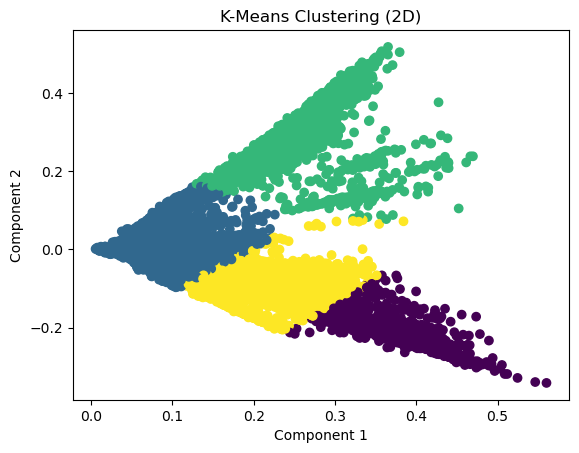

In [341]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Means Clustering (2D)')
plt.show()

In [345]:
import random

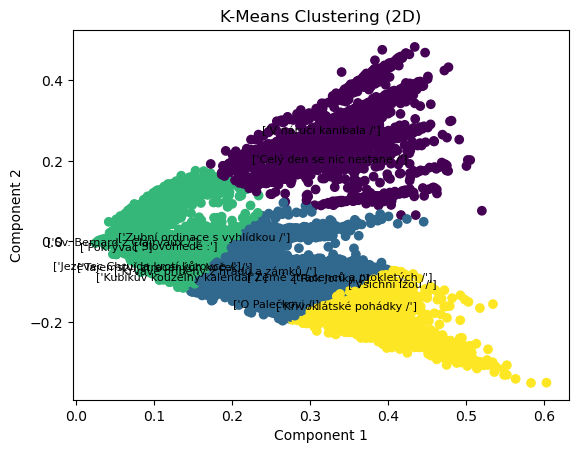

In [361]:
# Create the scatter plot
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'])

# Randomly select 10 data points for labeling
selected_points = random.sample(range(len(df)), 15)  # Select 10 random indices

# Add labels for selected points
for i in selected_points:
    plt.text(X_reduced[i, 0], X_reduced[i, 1], df.iloc[i]['245_a'], fontsize=8, ha='center', va='center')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Means Clustering (2D)')
plt.show()

In [274]:
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'])

# Add labels for each point
for i in range(len(df)):
    plt.text(X_reduced[i, 0], X_reduced[i, 1], df.index[i], fontsize=8, ha='center', va='center')

plt.show()


KeyboardInterrupt



In [256]:
klastry = df.groupby('100_7')['cluster'].first()
klastry

100_7
jk01010145        1
jk01010356        1
jk01010398        5
jk01010468        1
jk01011066        5
jk01011157        3
jk01011648        5
jk01011653        3
jk01011703        5
jk01011935        4
jk01011993        3
jk01012120        5
jk01012610        3
jk01012684        4
jk01012697        1
jk01012955        1
jk01013301        5
jk01020309        4
jk01020709        5
jk01020718        4
jk01021020        1
jk01021023        5
jk01021050        4
jk01021086        1
jk01021137        5
jk01021177        5
jk01021241        1
jk01021254        1
jk01021422        1
jk01021929        5
jk01022157        4
jk01022199        1
jk01022763        5
jk01022772        1
jk01022773        1
jk01023067        3
jk01023243        5
jk01023358        4
jk01023418        5
jk01030532        1
jk01030537        5
jk01030732        5
jk01031116        1
jk01031301        1
jk01031466        1
jk01031485        4
jk01031667        5
jk01031754        5
jk01032053        5
jk01032058    

In [363]:
pd.DataFrame(klastry).reset_index().merge(zdroj[['100_7','autorstvo']].drop_duplicates(), on='100_7', how='left').sort_values(by="autorstvo")

,100_7,cluster,autorstvo
1,jk01010356,1,Arbes Jakub
2,jk01010398,5,Aškenazy Ludvík
3,jk01010468,1,Baar Jindřich Šimon
5,jk01011157,3,Bauer Jan
288,jn20010309344,1,Benedikt Martin
6,jk01011648,5,Beneš Buchlovan Bedřich
294,jn20010310148,5,Beran Ladislav
8,jk01011703,5,Beráková Zora
9,jk01011935,4,Bešťáková Eva
11,jk01012120,5,Binar Ivan
